In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

%matplotlib inline

In [2]:
df = pd.read_csv('grad.csv')
df.head(1)

,admit,gre,gpa,rank
0,0,380,3.61,3


In [3]:
y = df.pop('admit')
X = df

In [5]:
X.head(2)

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [7]:
logistic = LogisticRegression().fit(X_train, y_train)

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
accuracy_score(y_test, logistic.predict(X_test))

0.7651515151515151

In [10]:
y.shape

(400,)

In [11]:
y.sum()

127

In [12]:
273/400

0.6825

In [13]:
127/400

0.3175

In [14]:
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [24]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(3,), name='L1'))
model.add(Dense(units=8, activation='relu', name='L2'))
model.add(Dense(units=1, activation='sigmoid', name='Out'))
opt = optimizers.SGD()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy', f1])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 16)                64        
_________________________________________________________________
L2 (Dense)                   (None, 8)                 136       
_________________________________________________________________
Out (Dense)                  (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=25, verbose=0, validation_split=0.3, shuffle=True)

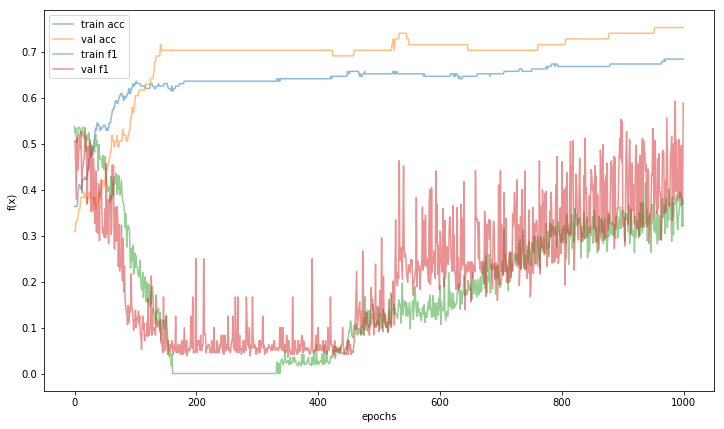

In [26]:
plt.figure(figsize=(12, 7))
plt.plot(history.epoch, history.history['binary_accuracy'], alpha=0.5, label='train acc')
plt.plot(history.epoch, history.history['val_binary_accuracy'], alpha=0.5, label='val acc')
plt.plot(history.epoch, history.history['f1'], alpha=0.5, label='train f1')
plt.plot(history.epoch, history.history['val_f1'], alpha=0.5, label='val f1')
plt.xlabel('epochs')
plt.ylabel('f(x)')

plt.legend()
plt.show()

In [27]:
accuracy_score(y_test, model.predict_classes(X_test))

0.7803030303030303